<a href="https://colab.research.google.com/github/manelsaddouki/KNN-Classification/blob/main/Random_Forest_%26_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

Here I start with downloading my dataset, check its characteristics, replace none values, and correct the values that cannot be converted to float.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv ( io.BytesIO(uploaded['housing (1).csv']),sep=";", names=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12','Col13','target'])

In [ ]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,target
0,0.00632,18.00,2.31,0,0.538,6.575,65.20,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.00,7.07,0,0.469,6.421,78.90,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.00,7.07,0,0.469,7.185,61.10,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.00,2.18,0,0.458,6.998,45.80,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.00,2.18,0,0.458,7.147,54.20,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
print(df)

           Col1      Col2  Col3  Col4   Col5   Col6      Col7       Col8  \
0     0.00632    18.00     2.31     0  0.538  6.575   65.20    4.0900      
1     0.02731     0.00     7.07     0  0.469  6.421   78.90    4.9671      
2     0.02729     0.00     7.07     0  0.469  7.185   61.10    4.9671      
3     0.03237     0.00     2.18     0  0.458  6.998   45.80    6.0622      
4     0.06905     0.00     2.18     0  0.458  7.147   54.20    6.0622      
..          ...       ...   ...   ...    ...    ...       ...        ...   
501   0.06263     0.00  1  1.93     0  0.573  6.593   69.10    2.4786      
502   0.04527     0.00  1  1.93     0  0.573  6.120   76.70    2.2875      
503   0.06076     0.00  1  1.93     0  0.573  6.976   91.00    2.1675      
504   0.10959     0.00  1  1.93     0  0.573  6.794   89.30    2.3889      
505   0.04741     0.00  1  1.93     0  0.573  6.030   80.80    2.5050      

     Col9  Col10  Col11   Col12  Col13  target  
0       1  296.0   15.3  396.90   4.98

In [ ]:
df= df.replace(np.nan,0)

In [ ]:
print(df)

           Col1      Col2  Col3  Col4   Col5   Col6      Col7       Col8  \
0     0.00632    18.00     2.31     0  0.538  6.575   65.20    4.0900      
1     0.02731     0.00     7.07     0  0.469  6.421   78.90    4.9671      
2     0.02729     0.00     7.07     0  0.469  7.185   61.10    4.9671      
3     0.03237     0.00     2.18     0  0.458  6.998   45.80    6.0622      
4     0.06905     0.00     2.18     0  0.458  7.147   54.20    6.0622      
..          ...       ...   ...   ...    ...    ...       ...        ...   
501   0.06263     0.00  1  1.93     0  0.573  6.593   69.10    2.4786      
502   0.04527     0.00  1  1.93     0  0.573  6.120   76.70    2.2875      
503   0.06076     0.00  1  1.93     0  0.573  6.976   91.00    2.1675      
504   0.10959     0.00  1  1.93     0  0.573  6.794   89.30    2.3889      
505   0.04741     0.00  1  1.93     0  0.573  6.030   80.80    2.5050      

     Col9  Col10  Col11   Col12  Col13  target  
0       1  296.0   15.3  396.90   4.98

In [ ]:
df.isnull().sum()

Col1      0
Col2      0
Col3      0
Col4      0
Col5      0
Col6      0
Col7      0
Col8      0
Col9      0
Col10     0
Col11     0
Col12     0
Col13     0
target    0
dtype: int64

In [ ]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,target
0,0.00632,18.00,2.31,0,0.538,6.575,65.20,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.00,7.07,0,0.469,6.421,78.90,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.00,7.07,0,0.469,7.185,61.10,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.00,2.18,0,0.458,6.998,45.80,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.00,2.18,0,0.458,7.147,54.20,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.iloc[57, 0] = 0.014321
df.iloc[57,0]

0.014321

In [ ]:
df=df.drop('Col8', axis=1)
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col9,Col10,Col11,Col12,Col13,target
0,0.00632,18.00,2.31,0,0.538,6.575,65.20,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.00,7.07,0,0.469,6.421,78.90,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.00,7.07,0,0.469,7.185,61.10,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.00,2.18,0,0.458,6.998,45.80,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.00,2.18,0,0.458,7.147,54.20,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00 1,1.93,0,0.573,6.593,69.10,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.00 1,1.93,0,0.573,6.120,76.70,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.00 1,1.93,0,0.573,6.976,91.00,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.00 1,1.93,0,0.573,6.794,89.30,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.iloc[501,1]

' 0.00  1'

In [ ]:
df['Col2']=df['Col2'].replace(" 0.00  1", "0.001")
df['Col2']=df['Col2'].replace(" 0.00  2", "0.002")
df['Col2']=df['Col2'].replace('28.00  1', '28.001')
df['Col7']=df['Col7'].replace(' 35.90 1', '35.901')
df['Col7']=df['Col7'].replace(' 18.50 1', '18.501')
df['Col7']=df['Col7'].replace(' 36.10 1', '36.101')
df['Col7']=df['Col7'].replace(' 21.90 1', '21.901')
df['Col7']=df['Col7'].replace(' 19.50 1', '19.501')
print(df)

           Col1      Col2  Col3  Col4   Col5   Col6      Col7  Col9  Col10  \
0     0.00632    18.00     2.31     0  0.538  6.575   65.20       1  296.0   
1     0.02731     0.00     7.07     0  0.469  6.421   78.90       2  242.0   
2     0.02729     0.00     7.07     0  0.469  7.185   61.10       2  242.0   
3     0.03237     0.00     2.18     0  0.458  6.998   45.80       3  222.0   
4     0.06905     0.00     2.18     0  0.458  7.147   54.20       3  222.0   
..          ...       ...   ...   ...    ...    ...       ...   ...    ...   
501   0.06263       0.001  1.93     0  0.573  6.593   69.10       1  273.0   
502   0.04527       0.001  1.93     0  0.573  6.120   76.70       1  273.0   
503   0.06076       0.001  1.93     0  0.573  6.976   91.00       1  273.0   
504   0.10959       0.001  1.93     0  0.573  6.794   89.30       1  273.0   
505   0.04741       0.001  1.93     0  0.573  6.030   80.80       1  273.0   

     Col11   Col12  Col13  target  
0     15.3  396.90   4.98  

Now, I prepare my features and my target column. then I split the dataset into training (70%) and test sets (30%):

In [ ]:
x = df.drop('target', axis= 1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Here is the prediction using the linear regression model: (the value for the intercept is 17.966)

In [ ]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
lmodel.intercept_

17.96591160957907

In [ ]:
y_prediction = lmodel.predict(X_train)

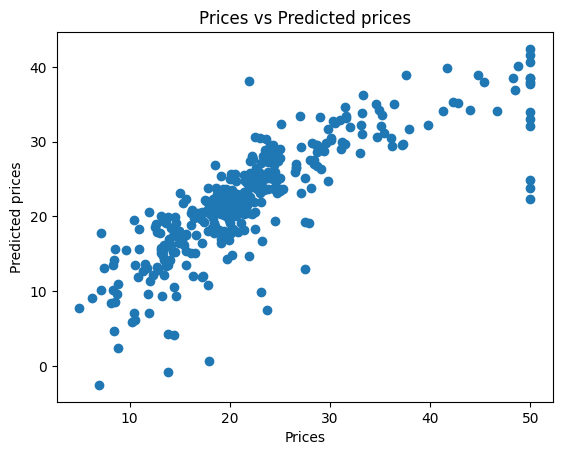

In [ ]:
# Differences between actual  and predicted values
plt.scatter(y_train, y_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Diff between Actual and Predicted prices")
plt.show()

We can notice that the curve is almost linar!

Now, we predict using the random forst regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
regr_prediction = regressor.predict(X_train)

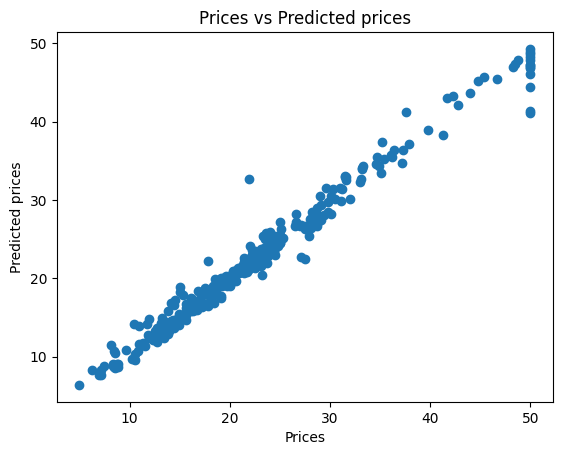

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, regr_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Diff between Actual and Predicted prices")
plt.show()

We can notice that the prediction using random forest is even better than the linear regression model